In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('medical_examination .csv')

In [12]:

df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)  # height is in cm, so divide by 100 to convert to meters
df['overweight'] = (df['BMI'] > 25).astype(int)

df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

def draw_cat_plot():
    # Melt the data
    df_cat = pd.melt(df, id_vars='cardio', value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # Group the data and count occurrences
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).size()

    # Convert Series from groupby size to DataFrame and rename 'size' column
    df_cat = df_cat.reset_index().rename(columns={0: 'total'})

    # Ensure 'total' column is numeric
    df_cat['total'] = pd.to_numeric(df_cat['total'], errors='coerce')

    # Convert 'value' column to string to avoid AttributeError
    df_cat['value'] = df_cat['value'].astype(str)

    # Create the categorical plot
    fig = sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar', height=6, aspect=1.2)

    # Set labels and legend
    fig.set_axis_labels("Variable", "Total Count")
    fig.legend.set_title("Value")  # Adjust for the legend
    plt.show()

    return fig

# Call the function
draw_cat_plot()



KeyError: 'total'

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


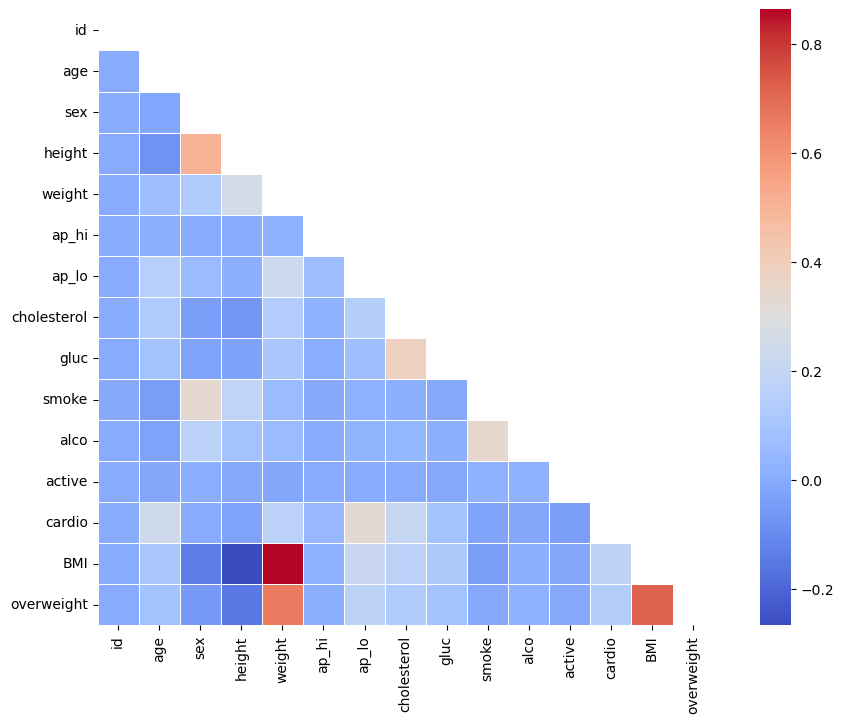

In [13]:
def draw_heat_map():
    # Clean the data
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    corr = df_heat.corr()

    
    mask = np.triu(np.ones_like(corr, dtype=bool))

    
    plt.figure(figsize=(12, 8))

    sns.heatmap(corr, annot=True, mask=mask, cmap="coolwarm", square=True, linewidths=.5)


    plt.show()


draw_heat_map()